In [5]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Regression line vs other lines

In [44]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr)) / np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    # r * SDy/SDx
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return 0 #r * (y_sd/x_sd)

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    # y_mean - x_mean * slope
    y_mean = np.mean(t.column(y))
    x_mean = np.mean(t.column(x))
    return y_mean - x_mean * slope(t,x,y) 

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    # slope * x + intercept
    # y = mx + b (slope-intercept form)
    x_arr = t.column(x)
    return slope(t,x,y) * x_arr + intercept(t,x,y)

# 2016 election dataset

In [7]:
demographics = Table.read_table('data/district_demographics2016.csv')
demographics

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3
Alabama,"Congressional District 6 (115th Congress), Alabama",61413,26.1,36.7
Alabama,"Congressional District 7 (115th Congress), Alabama",34664,69.8,19.4
Alaska,"Congressional District (at Large) (115th Congress), Alaska",76440,37.6,29.6
Arizona,"Congressional District 1 (115th Congress), Arizona",50537,46.6,24.5
Arizona,"Congressional District 2 (115th Congress), Arizona",49072,49.6,34


In [8]:
# our x is Median Income
# and our y is Percent voting for Clinton
# let's predict y (% voting for Clinton) based on x (Median Income)

predict_voting = demographics.select('Median Income', 'Percent voting for Clinton')
y_pred = fitted_values(demographics, 'Median Income', 'Percent voting for Clinton')
predict_voting = predict_voting.with_columns('Fitted',y_pred)
predict_voting

Median Income,Percent voting for Clinton,Fitted
47083,34.1,46.615
42035,33,45.6518
46544,32.3,46.5121
41110,17.4,45.4753
51690,31.3,47.494
61413,26.1,49.3491
34664,69.8,44.2454
76440,37.6,52.2162
50537,46.6,47.274
49072,49.6,46.9945


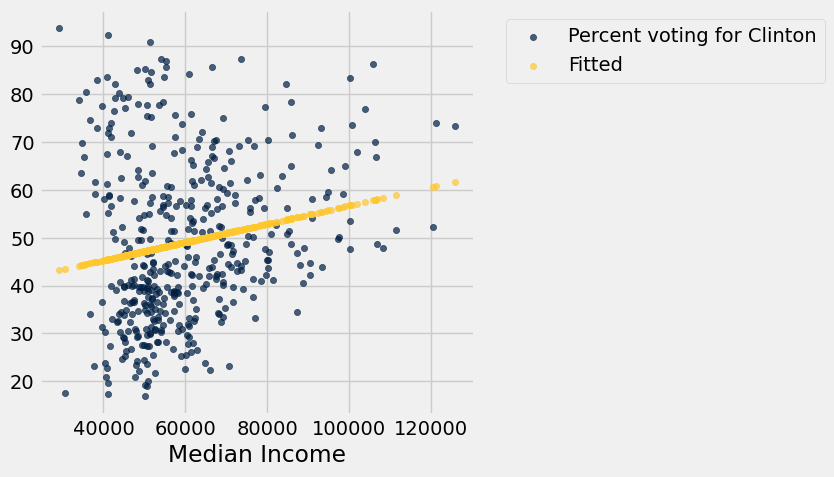

In [10]:
predict_voting.scatter('Median Income')
# Or we can do this below
# same thing
predict_voting.scatter('Median Income', ['Percent voting for Clinton', 'Fitted'])
# when we define our x-axis, and don't define our y-axis,
# by default, scatter will use the rest of your table as your y-axes

# if you have lots more columns in your table, you might consider explicitly defining what your y-axes are in the second argument
# note that you can pass in a list, with the columns you'd like to graph as your y-axes
# below, is essentially two graphs overlaid on top of each other

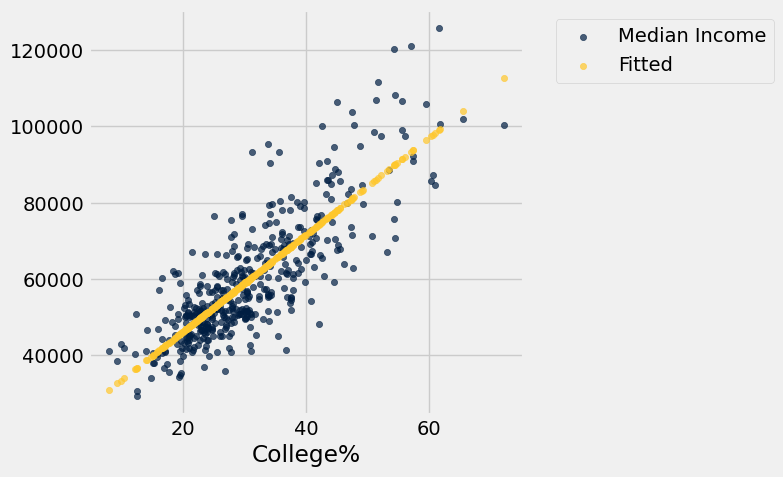

In [16]:
predict_income = demographics.select('College%', 'Median Income')
predict_income
y_pred = fitted_values(demographics, 'College%', 'Median Income')
y_pred
predict_income = predict_income.with_columns('Fitted', y_pred)
predict_income
predict_income.scatter('College%')

# Residuals

In [17]:
demographics = demographics.drop('State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


In [19]:
def residuals(t, x, y):
    predictions = fitted_values(t,x,y)
    # value - predicted value
    # blue dot - yellow dot (y coordinates)
    # vertical distance away from prediction
    values = t.column(y)
    return values - predictions

In [20]:
predictions = fitted_values(demographics, 'College%', 'Median Income')
my_residuals = residuals(demographics, 'College%', 'Median Income')
demographics = demographics.with_columns(
    'Fitted Value', predictions,
    'Residual', my_residuals
)
demographics

Median Income,College%,Fitted Value,Residual
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


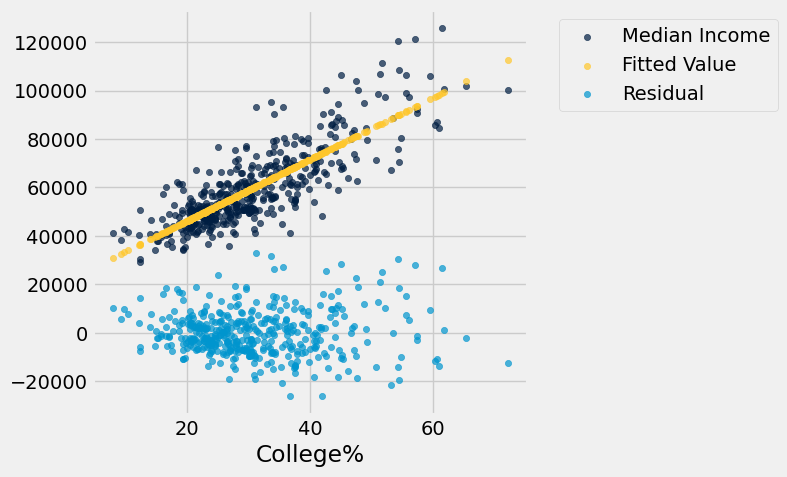

In [21]:
demographics.scatter('College%')
# with scatter, by default if we only specify the x-axis in the first argument
# it will also graph the rest of the remaining columns as a y-axis
# there are three graphs here overlaid on top of each other
# our original values (in dark blue)
# our predicted values (yellow)
# residuals (errors) in light blue

In [22]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t,x,y), 
        'Residual', residuals(t,x,y)
    )
    tbl.select(x,y,'Fitted').scatter(0) # create one scatter plot with actual values and predicted values
    tbl.scatter(x,'Residual') # create second scatter plot with just residuals

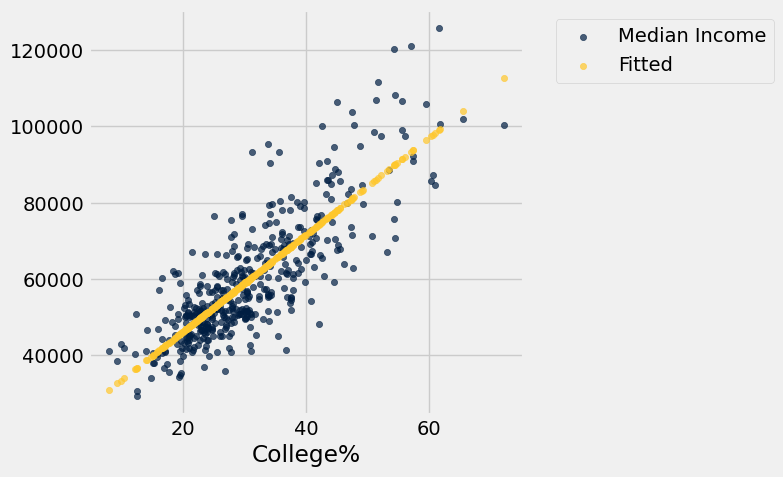

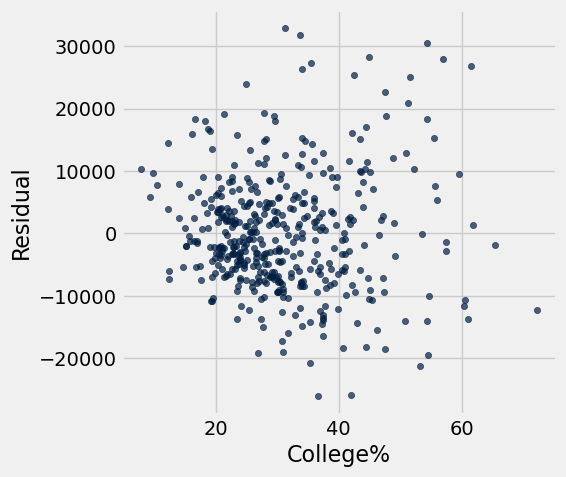

In [23]:
plot_residuals(demographics, 'College%', 'Median Income')

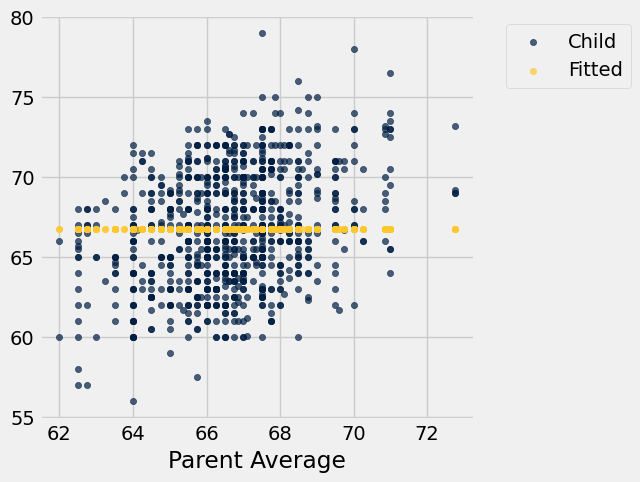

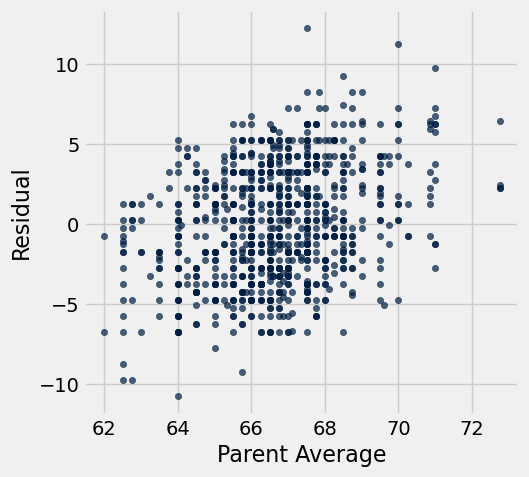

In [45]:
family_heights = Table.read_table('data/family_heights.csv')
parents = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parents,
    'Child', family_heights.column('child')
    )
plot_residuals(heights, 'Parent Average', 'Child')

# Dugongs 

In [25]:
dugong = Table.read_table('data/dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


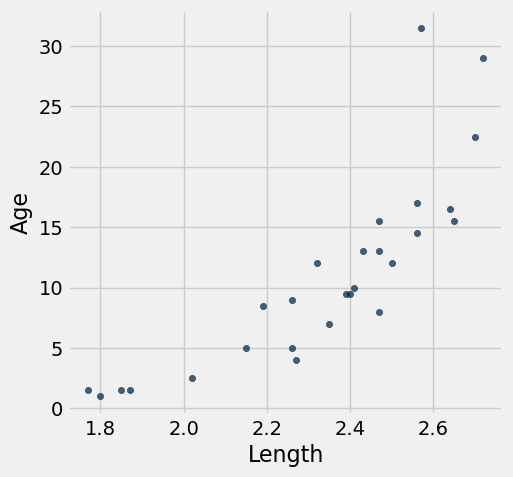

In [26]:
dugong.scatter('Length', 'Age')

In [27]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

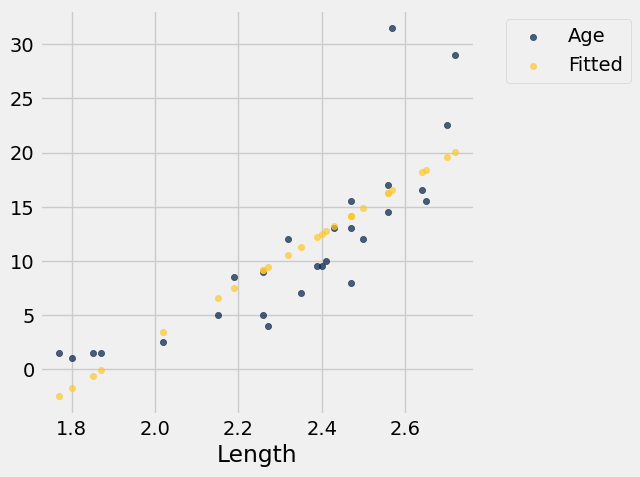

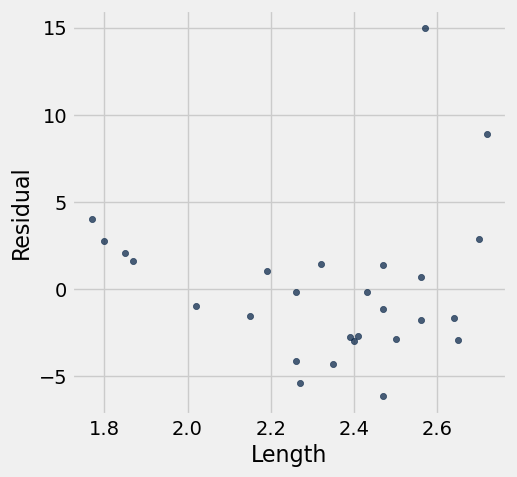

In [28]:
plot_residuals(dugong, 'Length', 'Age')

# US Women

In [29]:
us_women = Table.read_table('data/us_women.csv')
us_women.show(5)

height,ave weight
58,115
59,117
60,120
61,123
62,126


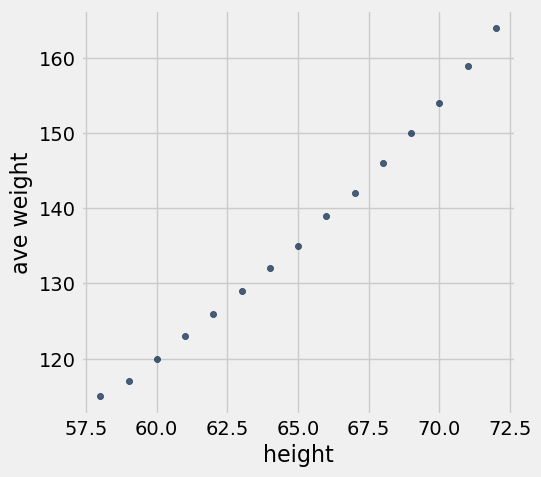

In [30]:
us_women.scatter('height')

In [31]:
correlation(us_women, 'height', 'ave weight')

0.99549476778421608

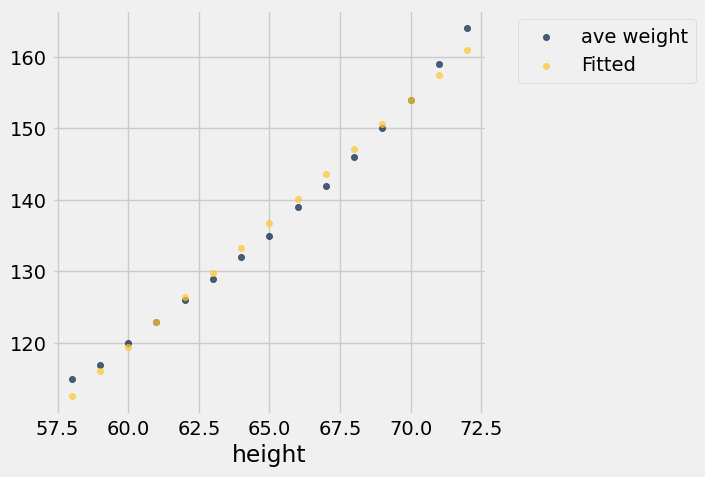

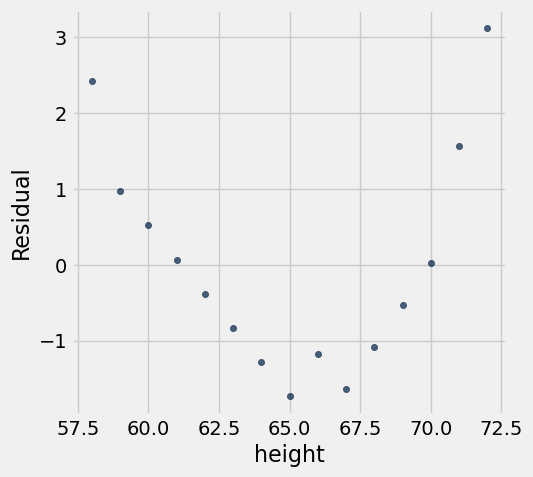

In [32]:
plot_residuals(us_women, 'height', 'ave weight')

# Average of Residuals 

In [33]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [34]:
round(np.average(residuals(heights, 'Parent Average', 'Child')), 6)

0.0

In [35]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

In [36]:
round(np.average(residuals(us_women, 'height', 'ave weight')), 6)
#AVERAGE residuals or error is 0

0.0

In [38]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'Parent Average', 'Child'),
    'Fitted Value', fitted_values(heights, 'Parent Average', 'Child')
)
heights

Parent Average,Child,Residual,Fitted Value
72.75,73.2,2.39613,70.8039
72.75,69.2,-1.60387,70.8039
72.75,69,-1.80387,70.8039
72.75,69,-1.80387,70.8039
71,73.5,3.859,69.641
71,72.5,2.859,69.641
71,65.5,-4.141,69.641
71,65.5,-4.141,69.641
69.5,71,2.35574,68.6443
69.5,68,-0.644261,68.6443


In [39]:
round(correlation(heights, 'Parent Average', 'Residual'), 6)
# there is no correlation between x and residuals

0.0

In [ ]:
# you can ensure the rest of the data sets also have no correlation between x and its residuals

